# Lecture 8: Randomness Part I

## Last time
Slicing of numpy arrays, messing around with images of shape `(M, N, 3)`, histograms. 

## Today
* review on histogram
* Randomness and scattered plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lambda function in Python
Recall in reviewing eigenvalues in Linear algebra, we want to avoid using lambda? This is because lambda has a special use in Python. It can be used to define a *function handle* or *anonymous function*, similar to `@` used in Matlab (`y = @(x) x^2 + 1`).

In [2]:
y = lambda x: x**2 + 1 # avoid using lambda in ordinary programming in Python

In [3]:
# this can be applied to ndarray as well

# Randomness

Randomness is used a lot both in mathematics and the real world.

Generally, a random number comes from a probability distribution. 

The distribution might be discrete: i.e., 
it comes from a set 

$$ \big\{ (x_1, p_1), ..., (x_n, p_n) \big\},$$

where you get outcome $x_i$ with probability $p_i$, i.e., 

$$P(X = x_i) = p_i.$$


It is assumed that $\sum_i p_i = 1$ (if not you can normalize the $p$'s so their sum is 1). The function that takes $x_i \mapsto p_i$ is called the *probability mass function*.

For continuous random numbers, one normally uses a *probability density function* (pdf). For example, the normal distribution comes from the following function: $\mathcal{N}(\mu, \sigma^2) $

$$p(x; \mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu )^2}{2\sigma^2} },$$

where $\mu$ and $\sigma$ are parameters (mean and standard deviation).

The probability of a random number from this distribution being in the interval $[a,b]$ is then:

$$P\big(X\in [a,b]\big) = \int_a^b p(x)\,dx$$

The most well-known distributions are the uniform distribution (where pdf is a constant) and the normal distribution. 

## Remark:

 The histogram is an estimate of the (probability) density distribution of a (continuous) variable.

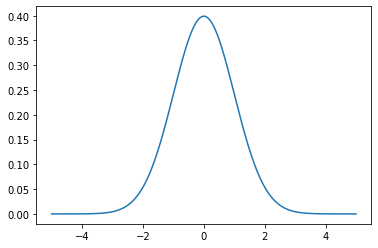

In [4]:
# let us graph the density function of the normal distribution.
from math import pi, sqrt, e
xs = np.linspace(-5,5,300)
pdf = lambda x: 1/sqrt(2*pi)*e**(-0.5*x**2) # pdf for N(0,1) standard normal dist
ys = pdf(xs)
plt.plot(xs, ys)
plt.show()

# numpy.random module

"pseudo" random number generator.

In [5]:
from numpy import random # random submodule in numpy, natively vectorized

## Random integers

In [6]:
# random.randint()
# simulate a die rolling sequence
N = 2000
X = np.zeros(N)
for i in range(N):
    X[i] = random.randint(1, 7)   # from 1 (inclusive) to 7 (exclusive)

In [7]:
# what is the mean of the dice rolling?

## Uniform distribution

The easiest distribution is the uniform distribution on $(0,1)$, in which all numbers in a given interval are equally likely. We can use the function `random.random()` that will produce a uniformly distributed random number in $(0,1)$.
Furthermore, we can turn this uniform random number from $(0,1)$ into random numbers from $a$ to $b$.

In [8]:
random.seed(42)
# the seed will initialize the random number generator
# fixing the seed will fix the "random" number generated
for i in range(5):
    r = random.random()
    print(r)

0.3745401188473625
0.9507143064099162
0.7319939418114051
0.5986584841970366
0.15601864044243652


In [9]:
def rnum(a,b):
    return a + (b-a)*random.random()

for i in range(5):
    print(rnum(-3,6))

-1.596049316974176
-2.4772474904862047
4.795585311974417
2.4100351056888796
3.372653200164409


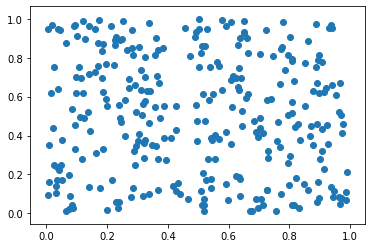

In [10]:
N = 300
x = np.random.uniform(0,1,N) # this syntax is okay as well
y = np.random.uniform(low=0,high=1,size=N)
plt.scatter(x,y)

### Adding scattered noise to a linear function

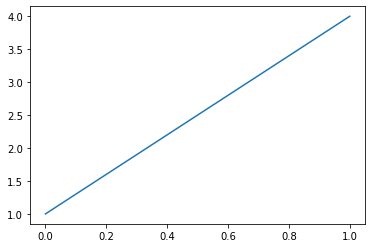

In [11]:
X = np.linspace(0,1,100)
Y = 3 * X + 1
plt.plot(X,Y)

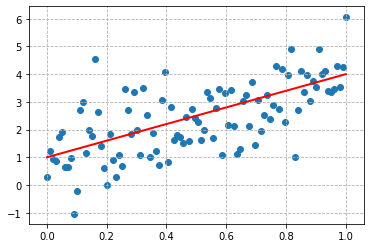

In [12]:
# let's add some noise
Z = 3 * X + 1 + np.random.normal(loc=0,scale=1, size= X.shape[0])
# np.random.normal(0,1, X.shape[0]) same output 
# loc is mean
# scale is standard dev
# size is the number of samples we draw in this distribution
# we'll see much more about randomness later
plt.scatter(X,Z)  # we use a scatter plot
plt.plot(X,Y, color = "red", linewidth= 2.0)
plt.grid(True, linestyle = 'dashed')

## Exercise 1:
Write a function `rand_linear`, takes input of the slope `m` and `b`, the strength of the normal random noise (mean 0 and standard deviation `sigma`), and a numpy array `x`, returns the function values of the linear function $y = mx + b$ with a random noise.

In [ ]:
# code here

## Normal distribution

Best way to view a probability distribution? Histogram.

In [ ]:
N = 50 # no. of samples
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.hist(X, bins=10, edgecolor='k')
plt.show()

In [ ]:
N = 500000 # no of samples
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45]) # fix our axes view
plt.hist(X,  bins=20,  density=True, edgecolor= 'k')
# plt.hist()
# bin size = (total sample)/(no. of bins)
plt.grid(True, linestyle = 'dashed')
plt.show()

$\sigma$ is the standard deviation, which measures how spread out the normal distribution is. For example:

In [ ]:
N = 500000
mu = 0.0
sigma = 2.0  # highers standard dev
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45])
plt.hist(X, bins=20, density=True, edgecolor ='k')
plt.grid(True, linestyle = 'dashed')
plt.show()

# looks the same but look at the numbers above and below

## Exercise 2:

* Change the `sigma` and the `bins` (no. of bins), while fix the axis by using `plt.axis([-6, 6, 0, 0.45])` like the plots above, see what happens.
* When plotting the histogram, toggle the option `density=True` to `density=False` (by default), see what happens.

Histogram of uniform distribution. 

In [ ]:
N = 50000
X = np.random.uniform(low=0, high=1, size=N)
plt.hist(X, 50)

plt.grid(True, linestyle = 'dashed')
plt.show()

You can compute the mean and standard deviation of any data:

In [ ]:
np.mean(X)

In [ ]:
np.std(X)

In general, if `X` is our dataset, then the normal distribution with `mu = np.mean(X)`, and `sigma = np.std(X)` will fit the dataset's "empircal distribution" best.

If a dataset's distribution is normal then **about 68 percent of the data values are within one standard deviation of the mean**:
$$
P(\mu - \sigma < X < \mu+\sigma) \approx 68\%
$$

<br><br>
Reference: [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)